In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


In [3]:
def preprocess_data(df):
    # convert minutes
    df                       = df[df['Minutes']!=0]
    df['minutes_in_seconds'] = df['Minutes'].apply(lambda x: convert_minutes_to_sec(x))    
    df                       = df[df['lineup_labeled'].isnull()==False]
    df['lineup_labeled']     = df['lineup_labeled'].apply(lambda x: sorted(ast.literal_eval(x)))
    df['key_labels']         = df['lineup_labeled'].apply(lambda x: '-'.join(map(str, x)))
    return df

def convert_minutes_to_sec(time_str):
    try:
        minutes, seconds = time_str.split(":")
        total_seconds = int(minutes) * 60 + int(seconds)
        return total_seconds
    except Exception as e: 
        print(time_str)
        return 0

In [4]:
players = pd.read_csv('data/all_set_of_players.csv', index_col=[1,2])
players

,,id,Points,Points per player's possession,Field goals made,Field goals attempted,"Field goals, %",2-pt field goals made,2-pt field goals attempted,"2-pt field goals, %",3-pt field goals made,...,Right drives,"Right drives made, %",Left drives made,Left drives,"Left drives made, %",Opp Drives shots made,Opp Drives shots,"Opponent Drives shots made, %",minutes_in_seconds,Cluster_Labels
player_name,team_name,,,,,,,,,,,,,,,,,,,,,
Jordan McRae,Hapoel SP Tel Aviv,0,0.323011,0.098485,0.146392,1.526017,-0.355960,-0.301946,-0.116089,-0.370666,1.878927,...,0.404777,-0.932415,1.206362,1.586438,-0.183693,-0.476008,-0.239608,-0.622679,1.158308,15
Xavier Munford,Hapoel SP Tel Aviv,1,-0.119143,0.114373,-0.411176,1.060169,-0.384085,-0.998388,-0.875851,-0.277780,1.960904,...,1.030772,-0.482878,0.727194,1.327334,-0.142203,1.092025,1.051366,0.403170,1.049630,15
J'Covan Brown,Hapoel SP Tel Aviv,2,-0.445170,-0.302963,-0.743531,0.766967,-0.804552,-1.465262,-1.141860,-0.684001,2.119392,...,0.044589,-1.604921,1.030667,1.301423,0.362364,-1.006727,-1.223448,-1.174764,0.970262,15
Tomer Ginat,Hapoel SP Tel Aviv,3,-0.423616,0.317041,-0.168574,0.988058,0.043033,-0.112789,-0.083979,-0.046303,0.690916,...,0.319018,-1.445177,-0.383261,0.048262,-1.680184,0.218981,-0.562251,0.506441,0.800923,15
Idan Zalmanson,Hapoel SP Tel Aviv,4,-1.245993,-0.144148,-1.104310,0.117196,0.095209,-0.897791,-0.831268,-0.125447,0.015324,...,-0.209661,-2.554343,-0.550590,-0.218656,-1.985201,0.054711,-0.332423,0.487821,-0.253715,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nadav Malka,Hapoel Nofar Energy Galil E,203,-1.480304,-1.848220,-1.438368,-2.140527,-1.604724,-1.454546,-1.625528,-1.779390,-0.613250,...,-0.437215,0.079456,-0.398494,-0.159093,-0.880526,0.133041,-0.599437,-0.245668,-2.238457,14
Briante Weber,Bnei Herzliya,204,0.254400,0.908621,0.424738,0.676969,1.161659,0.110657,0.139128,0.907261,0.130625,...,1.472782,0.300963,0.750075,0.246842,0.018311,0.422777,0.775999,1.900004,-0.857466,6
Ron Zipper,Hapoel Altshuler Shaham Be',205,-1.373051,-1.948302,-1.832106,-1.957493,-1.836736,-1.985568,-2.095288,-1.881992,-0.222201,...,-1.834919,-0.838101,-2.075003,-2.004550,-2.383135,-1.558064,-1.388525,-1.600385,-0.773018,10


In [21]:
df = pd.read_csv('data/post_processed/lineup_data_with_id.csv')

row_game_lineups = pd.DataFrame()
# for game and team build the df of lineup columns
for game_id in df['game_id'].unique():
    filtered_df = df[df['game_id'] == game_id]
    for team_name in filtered_df['team_name'].unique():
        filtered_df = filtered_df[filtered_df['team_name'] == team_name]
        grouped_filter = filtered_df.groupby('key_labels')[['Possessions','Plus/Minus']].sum()
        total_plus_minus = grouped_filter['Plus/Minus'].sum()
        game_row = grouped_filter[['Possessions']].T
        game_row.index = [f'{game_id}_{team_name}']
        game_row['y'] = total_plus_minus
        row_game_lineups = pd.concat([row_game_lineups,game_row])
row_game_lineups.fillna(0, inplace=True)

In [22]:
row_game_lineups

key_labels,4-5-5-5-7,4-5-5-5-9,4-5-5-7-9,5-5-5-5-5,5-5-5-5-7,5-5-5-5-9,5-5-5-7-9,y,3-3-3-7-9,3-3-7-9-9,...,4-13-13-13-13,4-4-4-4-4,8-8-9-9-9,3-3-3-4-4,4-5-5-5-6,4-5-5-6-7,4-5-5-6-9,4-5-6-7-9,3-4-7-9-9,4-7-9-9-9
0_Bnei Herzliya,2.0,20.0,30.0,4.0,12.0,8.0,11.0,-23,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_Maccabi Playtika Tel Aviv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_Hapoel B-Cure Laser Haifa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,2.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_Ironi Hai Motors Ness Ziona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2_Hapoel Nofar Energy Galil E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131_Hapoel SP Tel Aviv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132_Ironi Hai Motors Ness Ziona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132_Hapoel Gilboa Galil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133_Hapoel Gilboa Galil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0


In [18]:
row_game_lineups.shape

(268, 115)

In [19]:
row_game_lineups.to_csv('data/post_processed/row_game_lineups_mmm.csv')

In [20]:
row_game_lineups

key_labels,4-5-5-5-7,4-5-5-5-9,4-5-5-7-9,5-5-5-5-5,5-5-5-5-7,5-5-5-5-9,5-5-5-7-9,y,3-3-3-7-9,3-3-7-9-9,...,4-13-13-13-13,4-4-4-4-4,8-8-9-9-9,3-3-3-4-4,4-5-5-5-6,4-5-5-6-7,4-5-5-6-9,4-5-6-7-9,3-4-7-9-9,4-7-9-9-9
0_Bnei Herzliya,2.0,20.0,30.0,4.0,12.0,8.0,11.0,-23,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_Maccabi Playtika Tel Aviv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_Hapoel B-Cure Laser Haifa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,2.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_Ironi Hai Motors Ness Ziona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2_Hapoel Nofar Energy Galil E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131_Hapoel SP Tel Aviv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132_Ironi Hai Motors Ness Ziona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132_Hapoel Gilboa Galil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133_Hapoel Gilboa Galil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0


$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \ldots + \beta_n X_{ni} + \varepsilon_i$$


$$\begin{align*}
Y_i & : \text{The 'plus-minus' rating for the i-th game, our target variable.} \\
X_{ji} & : \text{A binary variable indicating the presence (1) or absence (0) of the j-th lineup combination in the i-th game.} \\
\beta_0 & : \text{The intercept, representing the expected 'plus-minus' when all lineup combinations are absent (all } X_{ji} = 0\text{).} \\
\beta_j & : \text{The coefficient of the j-th lineup combination.} \\
& : \text{This represents the expected change in 'plus-minus' for a unit change in } X_{ji} \text{, while holding all other lineup combinations constant.} \\
\varepsilon_i & : \text{The error term for the i-th game, representing the difference between the observed and predicted 'plus-minus'.}
\end{align*}
$$

$$f(x, \gamma) = \exp\left(-\gamma \left| x - \mu \right|^2\right)$$


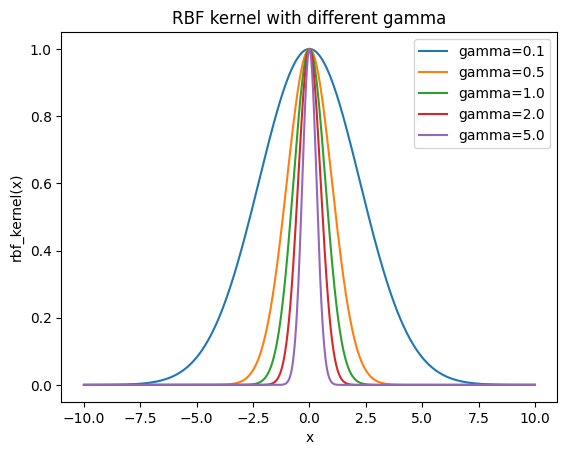

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x, gamma=0.1):
    return np.exp(-gamma * np.abs(x - np.mean(x))**2)

x = np.linspace(-10, 10, 1000)

for gamma in [0.1, 0.5, 1.0, 2.0, 5.0]:
    y = rbf_kernel(x, gamma)
    plt.plot(x, y, label=f'gamma={gamma}')

plt.legend()
plt.title('RBF kernel with different gamma')
plt.xlabel('x')
plt.ylabel('rbf_kernel(x)')
plt.show()


/var/folders/qq/_31d0jlx6_7fxf33tt1nbdw80000gq/T/ipykernel_30148/4245344185.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-t/tau)
/var/folders/qq/_31d0jlx6_7fxf33tt1nbdw80000gq/T/ipykernel_30148/4245344185.py:5: RuntimeWarning: invalid value encountered in divide
  return np.exp(-t/tau)


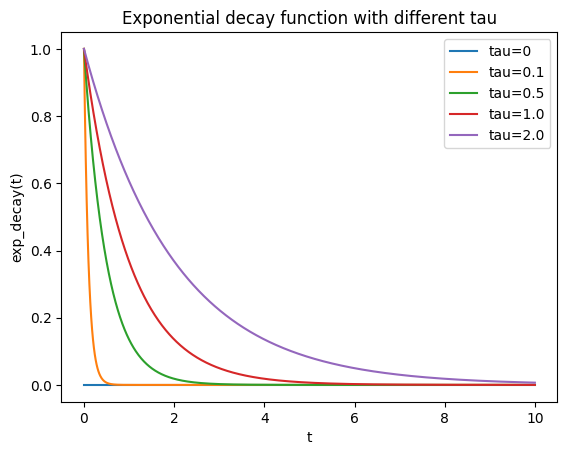

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def exp_decay(t, tau=1):
    return np.exp(-t/tau)

t = np.linspace(0, 10, 1000)

for tau in [0,0.1,0.5, 1.0, 2.0]:
    y = exp_decay(t, tau)
    plt.plot(t, y, label=f'tau={tau}')

plt.legend()
plt.title('Exponential decay function with different tau')
plt.xlabel('t')
plt.ylabel('exp_decay(t)')
plt.show()


$$f(t, \tau) = \exp\left(-\frac{t}{\tau}\right)$$

$$y = \sum_{i=1}^{n} f(X_i, \tau_i) \cdot \beta_i = \sum_{i=1}^{n} \exp\left(-\frac{X_i}{\tau_i}\right) \cdot \beta_i $$

$$\underset{\tau_1, \tau_2, \ldots, \tau_n}{\text{minimize}} \; MSE(y, \hat{y}) = \frac{1}{m} \sum_{j=1}^{m} (y_j - \hat{y}_j)^2$$

$$\hat{y}_j = \sum_{i=1}^{n} \exp\left(-\frac{X_{ij}}{\tau_i}\right) \cdot \beta_i \cdot x_{ij}
$$

\begin{align*}
\text{Maximize:} \quad & f(\mathbf{x}) \\
\text{Subject to:} \quad & \sum_{i \in K} x_i = N \\
& x_i = 0 \quad \text{for all} \quad i \notin K \\
\text{where} \quad & K \quad \text{represents the set of feasible predictors.}
\end{align*}


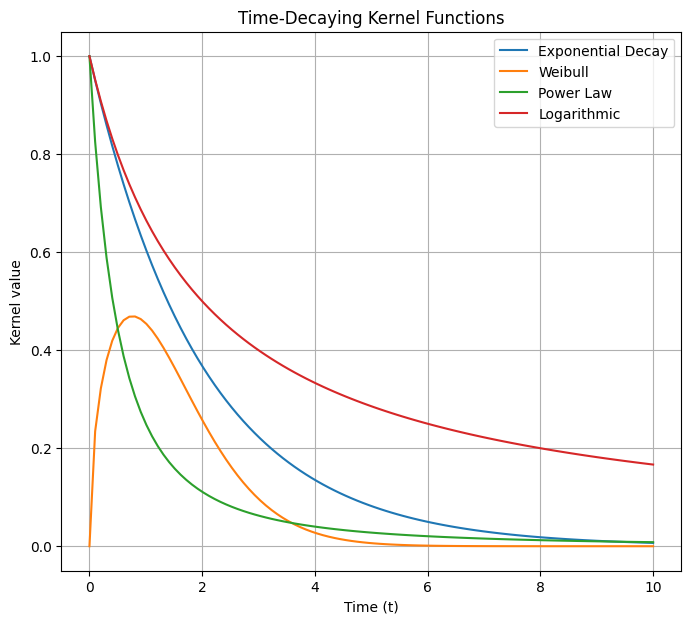

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter definitions
lambda_val = 0.5
t = np.linspace(0, 10, 100)

# Weibull parameters
k = 1.5

# Power Law parameters
tau = 1
alpha = 2

# Exponential Decay Kernel
exponential_decay = np.exp(-lambda_val * t)

# Weibull Kernel
weibull = lambda_val * k * (t**(k-1)) * np.exp(-lambda_val * t**k)

# Power Law Kernel
power_law = (1 + t/tau)**-alpha

# Logarithmic Kernel
logarithmic = 1 / (1 + lambda_val * t)

# Plotting
plt.figure(figsize=(8, 7))
plt.plot(t, exponential_decay, label='Exponential Decay')
plt.plot(t, weibull, label='Weibull')
plt.plot(t, power_law, label='Power Law')
plt.plot(t, logarithmic, label='Logarithmic')
plt.legend()
plt.title('Time-Decaying Kernel Functions')
plt.xlabel('Time (t)')
plt.ylabel('Kernel value')
plt.grid(True)
plt.show()


In [45]:
import numpy as np

start = np.log(1e-5)
end = np.log(10)

print("Start of the range:", start)
print("End of the range:", end)

Start of the range: -11.512925464970229
End of the range: 2.302585092994046


In [ ]:
np.log(1e-5), np.log(1)